In [1]:
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2
import sys

from matplotlib import rc

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_svmlight_file
import numpy as np
import pickle
import glob
import os

from matplotlib.ticker import MaxNLocator

from utils import unpickle_dir

from constants import LOSS_PER_EPOCH

LOG_SCALE = True

In [3]:
optimums = unpickle_dir('dump/optimum-epsilon/')
exact_optimum = optimums['baselines']['epsilon']

In [4]:
exact_optimum

0.2822915437266857

In [5]:
n, d = 400000, 2000

In [6]:
def plot_final(method, quantization, split_way, num_nodes,topology, label, display_name):
    
    data = unpickle_dir('dump/epsilon-final-' + method + "-" + quantization + ("" if len(quantization) == 0 else "-")
                + split_way + "-" + str(num_nodes)+topology)
    
    x = (np.arange(0, len(data['results'][1]))-shift)/LOSS_PER_EPOCH
#     print(x)
#     print(data['results'])
    
    plt.plot(x, data['results'][1]-exact_optimum, label = display_name)
   

    


In [7]:
def plot_scores_vs_bits(data, label, quantization, num_nodes, shift=0, display_name=None,
                        ):
    print(display_name)
    scores = data["results"][1]
    print(data["results"][1].shape[0])
    scores[data == 0] = 1e20
    scores[np.isinf(scores)] = 1e20
    scores[np.isnan(scores)] = 1e20
    if quantization == "random-20":
        num_bits_array = n / LOSS_PER_EPOCH * np.arange(data["results"][1].shape[0] - shift) * 64 * (2 ) * 20+ 1#1e+8
    elif quantization == "top-20":
        num_bits_array = n / LOSS_PER_EPOCH * np.arange(data["results"][1].shape[0] - shift) * (64 + 11) * (2 ) * 20+ 1#1e+8
    elif quantization == "":
        num_bits_array = n / LOSS_PER_EPOCH * np.arange(data["results"][1].shape[0] - shift) * 64 * (2) * d +1#1e+8
    elif quantization == "qsgd-4bit":
        num_bits_array = n / LOSS_PER_EPOCH * np.arange(data["results"][1].shape[0] - shift) * (4 + 1) * (2 ) * d + 1#1e+8
    elif quantization == "qsgd-2bit":
        num_bits_array = n / LOSS_PER_EPOCH * np.arange(data["results"][1].shape[0] - shift) * (2 + 1) * (2 ) * d + 1#1e+8
    elif quantization == "qsgd-8bit":
        num_bits_array = n / LOSS_PER_EPOCH * np.arange(data["results"][1].shape[0] - shift) * (8 + 1) * (2 ) * d + 1#1e+8
    
    print(len(num_bits_array))
    plt.plot(num_bits_array,
             scores - exact_optimum, label=display_name)
    scores[scores > 1e10] = np.inf
   


def plot_final_vs_bits(method, quantization, split_way, num_nodes,topology ,label, display_name):
    data = unpickle_dir('dump/epsilon-final-' + method + "-" + quantization + ("" if len(quantization) == 0 else "-")
                    + split_way + "-" + str(num_nodes)+topology)
    plot_scores_vs_bits(data, label, quantization, num_nodes, display_name=display_name)

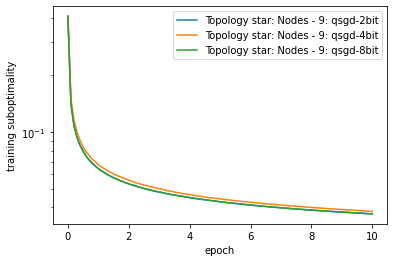

In [43]:
quantizations = [ "qsgd-4bit", "qsgd-8bit"]
topologies = ['ring', 'star', 'random']
num_nodes = [9, 25, 64]

shift = 0
method = "dcd"
label =  'decentralized' + ""
display_name = []
color = "C0"
marker = 'o'
markevery = 10

for split_way in ['random']:
    
    for num_node in [9]:
        
        for topology in ['star']:
            for quantization in quantizations:

                display_name = 'Topology ' + topology + ': '+ "Nodes - "+str(num_node) +": "+ quantization 

                plot_final(method, quantization, split_way, num_node, topology, label, display_name )

    name = "different quantization " + str(num_node) + ' nodes ' + topology + " Topology"
            
    plt.legend()
    plt.yscale("log")
#     plt.ylim(5e-4, 2)
#     plt.xscale("log")
    plt.xlabel('epoch')
    plt.ylabel('')
    plt.ylabel("training suboptimality")
    plt.savefig(name, dpi =1000)
    

Plot vs bits
